# Machine Learning & Statistics Module
### Assessment by Simona Vasiliauskaite G00263352
### Analysis of Boston Housing Database
### 2019

 **Section 1.** Summary of the Boston House Prices dataset using descriptive analysis and plots

In [37]:
# Import Python libraries needed for this project

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns
import scipy.stats as stats

import sklearn
import statsmodels.api as sm

%matplotlib inline

In [38]:
# Import Boston Housing dataset from sci-kit learn library
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

from sklearn.datasets import load_boston
boston = load_boston()

In [39]:
# Check what fields names are in this dataset

print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [40]:
# Print the dataset description

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Describe method gave us an indication that Median Value is normally the target.

In [41]:
#Might delete - not relevant

bos = pd.DataFrame(boston.data)
print(bos.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [42]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [43]:
# Find info about pricing data

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))
data.describe().T

Boston housing dataset has 489 data points with 4 variables each.


,count,mean,std,min,25%,50%,75%,max
RM,489.0,6.240288,0.643650,3.561,5.88,6.185,6.575,8.398
LSTAT,489.0,12.939632,7.081990,1.980,7.37,11.690,17.120,37.970
PTRATIO,489.0,18.516564,2.111268,12.600,17.40,19.100,20.200,22.000
MEDV,489.0,454342.944785,165340.277653,105000.000,350700.00,438900.000,518700.000,1024800.000


In [44]:
# Minimum price of the data
minimum_price = prices.min()

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices) 

In [45]:
# Show the calculated statistics
print ("Boston Housing Dataset Statistics: \n")
print ("Number of houses = ", len(prices))
print ("Number of features = ", len(list(features.keys())))
print ("Minimum house price = ", np.min(prices))
print ("Maximum house price = ", np.max(prices))
print ("Mean house price = ", "%.2f" % np.mean(prices))
print ("Median house price = ", "%.2f" % np.median(prices))
print ("Standard deviation of house prices =", "%.2f" % np.std(prices))

Boston Housing Dataset Statistics: 

Number of houses =  489
Number of features =  3
Minimum house price =  105000.0
Maximum house price =  1024800.0
Mean house price =  454342.94
Median house price =  438900.00
Standard deviation of house prices = 165171.13


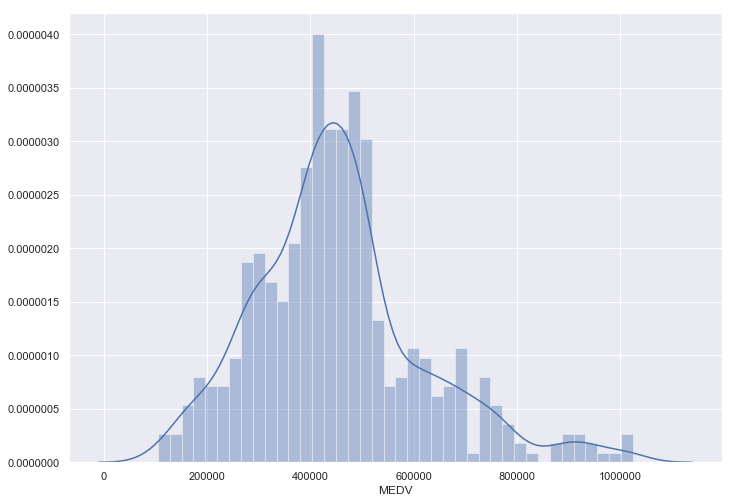

In [46]:
# plot distribution of the target variable median value using distplot
# from seaborn library
# https://seaborn.pydata.org/tutorial/distributions.html

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['MEDV'], bins=40)
plt.show()

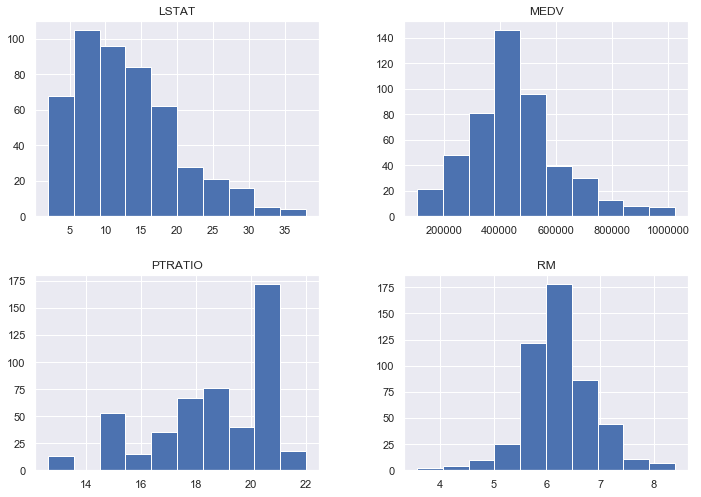

In [53]:
# histograms
data.hist()
plt.show()

In [58]:
data['RM'].value_counts()

6.229    3
6.417    3
6.405    3
5.713    3
6.167    3
        ..
6.701    1
6.232    1
6.593    1
6.425    1
6.625    1
Name: RM, Length: 430, dtype: int64

In [59]:
data['LSTAT'].value_counts()

8.05     3
7.79     3
14.10    3
18.13    3
6.36     3
        ..
27.80    1
13.09    1
6.43     1
9.69     1
6.87     1
Name: LSTAT, Length: 442, dtype: int64